# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
%load_ext autoreload
%autoreload 2
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
import platform
import os

# Checking platform/machine
print('Current platform: {}-{}'.format(platform.system(), platform.machine()))
unity_env_folder = 'unity_envs'
agent_version = '1_agent'  # '20_agents' # vs 1_agent
# Since I am switching between platforms
unity_env_file_name = {'Linux-x86_64': os.path.join(unity_env_folder, agent_version, 'Linux', 'Reacher.x86_64'),
                       'Darwin-x86_64': os.path.join(unity_env_folder, 'Darwin', 'Reacher.app')}['{}-{}'.format(platform.system(), platform.machine())]

Current platform: Linux-x86_64


In [3]:
unity_env_file_name

'unity_envs/1_agent/Linux/Reacher.x86_64'

In [4]:
env = UnityEnvironment(file_name=unity_env_file_name)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [7]:
# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

States look like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]
States have length: 33


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [8]:
num_agents

1

In [9]:
actions = np.random.randn(num_agents, action_size)
actions.shape

(1, 4)

In [10]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

# A helper Function for score plotting (confiurable MA)

In [11]:
def ma(scores, window):
    """ Moving average helper (for result plotting)"""
    tmp = np.cumsum(scores)
    return (tmp[window:] - tmp[:-window])/window

def plot_scores(agents, episodes_window=100):
    """ A helper to plot scores."""
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for agent in agents:
        scores = ma (agent.scores, episodes_window)
        plt.plot(np.arange(episodes_window, episodes_window + len(scores)), scores, label=agent.name) 

    # plt.yticks (range(30))
    plt.ylabel('Score av. window [{}]'.format(episodes_window))
    plt.xlabel('Episode #')
    plt.legend()
    plt.grid()
    plt.show()

# Building/Training the Agent

In [12]:

def extract_state(env_info) -> np.ndarray:
    """ state extractor: extracts state representation from env_info"""
    return env_info.vector_observations

In [13]:
from ddpg_agent import DDPGAgent, LocalTarget
from replay_buffer import PrioritizedReplayBufferFactory, UniformReplayBufferFactory
from q_net import ActorFCNetFactory, CriticFCNetFactory

replay_buffer_factory = UniformReplayBufferFactory()
actor_factory = ActorFCNetFactory(state_size, action_size, layers=(512,256))
critic_factory = CriticFCNetFactory(state_size, action_size,  state_rep_layers = (64,) , critic_layers = (128,))

explorer = DDPGAgent(actor_factory, critic_factory, replay_buffer_factory, actors_nbr=num_agents,
                          seed=0, step_to_update=3, buffer_size=int(1e5), batch_size=256, name='ddpg exploration', lr_actor=1e-4, lr_critic=1e-4)
explorer.explore(env, extract_state, n_episodes=1000, max_t=1000)

INFO:root:Building replay buffer with size 100000


Critic.local check: CriticFCNet(
  (state_rep_layers): ModuleList(
    (0): Linear(in_features=33, out_features=64, bias=True)
  )
  (critic_layers): ModuleList(
    (0): Linear(in_features=68, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=1, bias=True)
  )
)
ActorFCNet(
  (layers): ModuleList(
    (0): Linear(in_features=33, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=4, bias=True)
  )
  (batch_norm): ModuleList(
    (0): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)
Episode 100	Average Score: 2.23
Episode 200	Average Score: 6.04
Episode 300	Average Score: 7.74
Episode 400	Average Score: 12.58
Episode 500	Average Score: 17.18
Episode 600	Average Scor

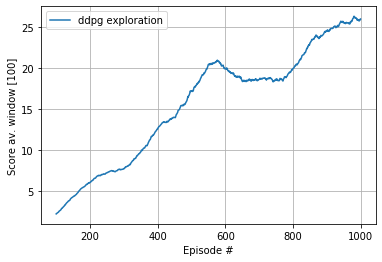

In [16]:
plot_scores([explorer], 100)

In [17]:
# Was close explore more 
explorer.explore(env, extract_state, n_episodes=1000, max_t=1000)

Critic.local check: CriticFCNet(
  (state_rep_layers): ModuleList(
    (0): Linear(in_features=33, out_features=64, bias=True)
  )
  (critic_layers): ModuleList(
    (0): Linear(in_features=68, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=1, bias=True)
  )
)
ActorFCNet(
  (layers): ModuleList(
    (0): Linear(in_features=33, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=4, bias=True)
  )
  (batch_norm): ModuleList(
    (0): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)
Episode 100	Average Score: 26.82
Episode 200	Average Score: 25.88
Episode 300	Average Score: 28.87
Episode 400	Average Score: 25.48
Episode 500	Average Score: 25.80
Episode 600	Average S

# Visualizing training session (from score perspective)

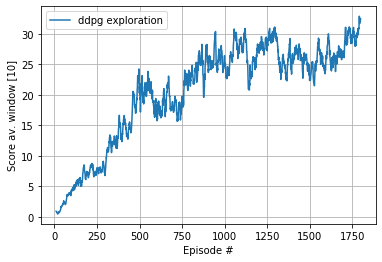

In [19]:
plot_scores([explorer], 10)

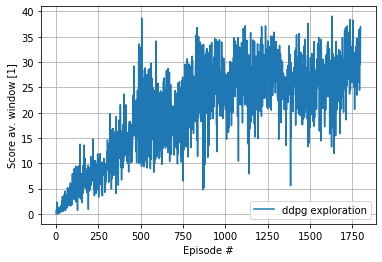

In [22]:
plot_scores([explorer], 1)

In [21]:
# Saving Actor and critic models
import torch
torch.save(explorer.critic.local.state_dict(), '{}.chpnt.pth'.format('ddpg_critic'))
for index, actor in enumerate(explorer.actors):
        torch.save(explorer.critic.local.state_dict(), '{}_{}.chpnt.pth'.format('ddpg_actor', index))

## That was long :) Ideas for Future Work:

The env is `nicely` solved in 1800 episodes.
This is improvable from the episode efficiency perspective.
One of the extension here is to tune more the parameters to get the training faster. Another alternative is to leverage the 20 agents environement to extend the implementaion to a A3C (Asynchronous actor critic agent) or A3C Like.
Then extend this experience to the Crawler unity env.

In [23]:
env.close()